In [1]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')
os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')


In [2]:
!kaggle datasets download -d vishalsubbiah/pokemon-images-and-types
!unzip pokemon-images-and-types.zip

Dataset URL: https://www.kaggle.com/datasets/vishalsubbiah/pokemon-images-and-types
License(s): Attribution 4.0 International (CC BY 4.0)
 81% 3.00M/3.68M [00:01<00:00, 3.16MB/s]
100% 3.68M/3.68M [00:01<00:00, 2.85MB/s]
Archive:  pokemon-images-and-types.zip
  inflating: images/abomasnow.png    
  inflating: images/abra.png         
  inflating: images/absol.png        
  inflating: images/accelgor.png     
  inflating: images/aegislash-blade.png  
  inflating: images/aerodactyl.png   
  inflating: images/aggron.png       
  inflating: images/aipom.png        
  inflating: images/alakazam.png     
  inflating: images/alomomola.png    
  inflating: images/altaria.png      
  inflating: images/amaura.png       
  inflating: images/ambipom.png      
  inflating: images/amoonguss.png    
  inflating: images/ampharos.png     
  inflating: images/anorith.png      
  inflating: images/araquanid.png    
  inflating: images/arbok.png        
  inflating: images/arcanine.png     
  inflating: im

In [2]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
import matplotlib.pyplot as plt

This is the list of all the files present in the path given to us:

['abomasnow.png', 'abra.png', 'absol.png', 'accelgor.png', 'aegislash-blade.png', 'aerodactyl.png', 'aggron.png', 'aipom.png', 'alakazam.png', 'alomomola.png', 'altaria.png', 'amaura.png', 'ambipom.png', 'amoonguss.png', 'ampharos.png', 'anorith.png', 'araquanid.png', 'arbok.png', 'arcanine.png', 'arceus.png', 'archen.png', 'archeops.png', 'ariados.png', 'armaldo.png', 'aromatisse.png', 'aron.png', 'articuno.png', 'audino.png', 'aurorus.png', 'avalugg.png', 'axew.png', 'azelf.png', 'azumarill.png', 'azurill.png', 'bagon.png', 'baltoy.png', 'banette.png', 'barbaracle.png', 'barboach.png', 'basculin-red-striped.png', 'bastiodon.png', 'bayleef.png', 'beartic.png', 'beautifly.png', 'beedrill.png', 'beheeyem.png', 'beldum.png', 'bellossom.png', 'bellsprout.png', 'bergmite.png', 'bewear.png', 'bibarel.png', 'bidoof.png', 'binacle.png', 'bisharp.png', 'blacephalon.png', 'blastoise.png', 'blaziken.png', 'blissey.png', 'blitzle

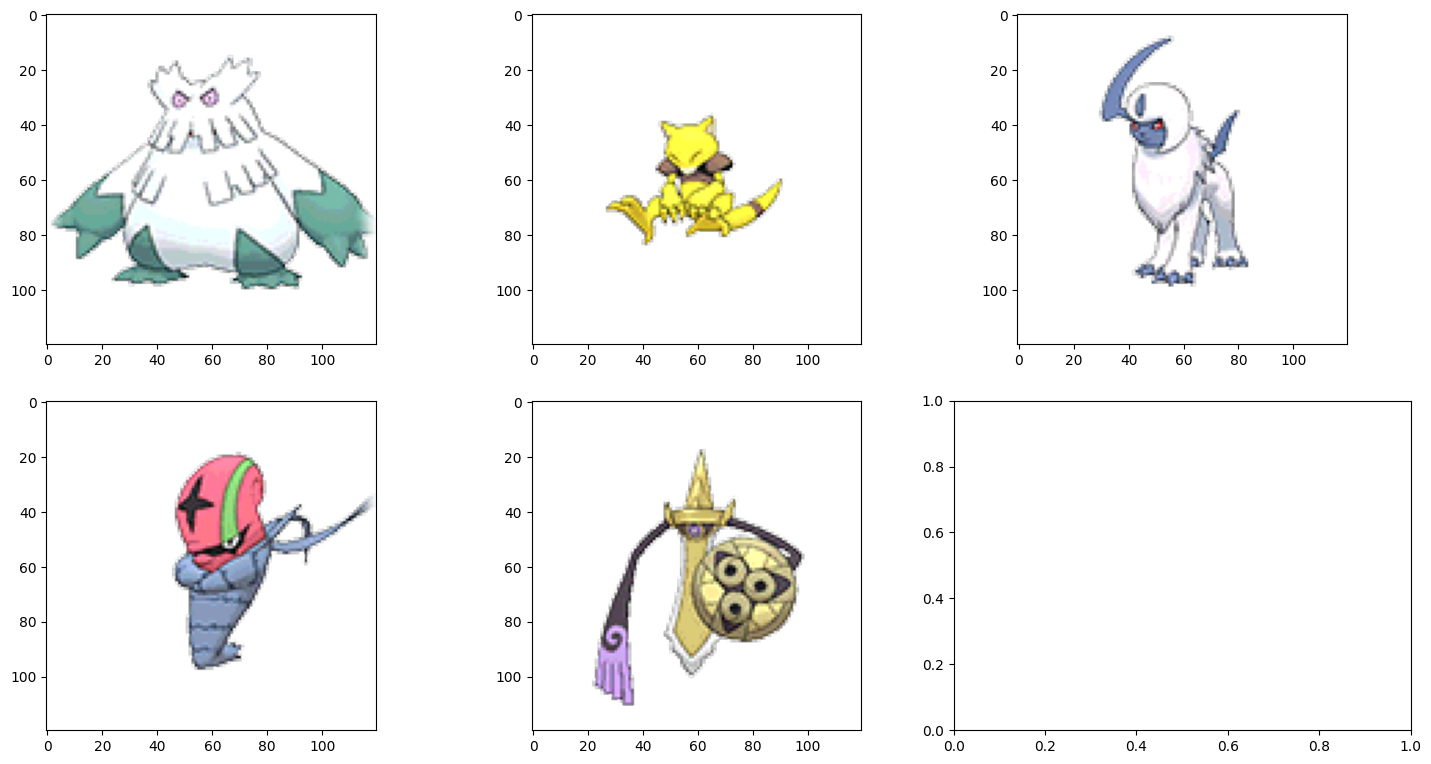

In [3]:
# defining root directory
from PIL import Image

root_dir = "./images"

files =  os.path.join(root_dir)
File_names = os.listdir(files)
print("This is the list of all the files present in the path given to us:\n")
print(File_names)

# plot here
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
first_five = File_names[0:6]

def subplots():
# Use the axes for plotting
    i = 0
    j = 0
    k = 0
    for k in range(5):
        state = os.path.join(root_dir, first_five[k])
        img = Image.open(state)
        axes[i,j].imshow(img)

        if k==2:
            i +=1
            j = 0
        else:
            j += 1


    plt.tight_layout(pad=2);

subplots()

In [4]:
## Run the below cells as it is
data = pd.read_csv("./pokemon.csv")

data.head()

,Name,Type1,Type2,Evolution
0,bulbasaur,Grass,Poison,ivysaur
1,ivysaur,Grass,Poison,venusaur
2,venusaur,Grass,Poison,NaN
3,charmander,Fire,NaN,charmeleon
4,charmeleon,Fire,NaN,charizard


In [5]:
## Run the below cells as it is
data_dict = {}

for key, val in zip(data["Name"], data["Type1"]):
    data_dict[key] = val
print(data_dict)


{'bulbasaur': 'Grass', 'ivysaur': 'Grass', 'venusaur': 'Grass', 'charmander': 'Fire', 'charmeleon': 'Fire', 'charizard': 'Fire', 'squirtle': 'Water', 'wartortle': 'Water', 'blastoise': 'Water', 'caterpie': 'Bug', 'metapod': 'Bug', 'butterfree': 'Bug', 'weedle': 'Bug', 'kakuna': 'Bug', 'beedrill': 'Bug', 'pidgey': 'Normal', 'pidgeotto': 'Normal', 'pidgeot': 'Normal', 'rattata': 'Normal', 'raticate': 'Normal', 'spearow': 'Normal', 'fearow': 'Normal', 'ekans': 'Poison', 'arbok': 'Poison', 'pikachu': 'Electric', 'raichu': 'Electric', 'sandshrew': 'Ground', 'sandslash': 'Ground', 'nidoran-f': 'Poison', 'nidorina': 'Poison', 'nidoqueen': 'Poison', 'nidoran-m': 'Poison', 'nidorino': 'Poison', 'nidoking': 'Poison', 'clefairy': 'Fairy', 'clefable': 'Fairy', 'vulpix': 'Fire', 'ninetales': 'Fire', 'jigglypuff': 'Normal', 'wigglytuff': 'Normal', 'zubat': 'Poison', 'golbat': 'Poison', 'oddish': 'Grass', 'gloom': 'Grass', 'vileplume': 'Grass', 'paras': 'Bug', 'parasect': 'Bug', 'venonat': 'Bug', 've

In [6]:
labels = data["Type1"].unique()
print(labels)

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']


In [7]:
ids = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
labels_idx = dict(zip(labels,ids))

print(labels_idx)

{'Grass': 0, 'Fire': 1, 'Water': 2, 'Bug': 3, 'Normal': 4, 'Poison': 5, 'Electric': 6, 'Ground': 7, 'Fairy': 8, 'Fighting': 9, 'Psychic': 10, 'Rock': 11, 'Ghost': 12, 'Ice': 13, 'Dragon': 14, 'Dark': 15, 'Steel': 16, 'Flying': 17}


In [8]:
final_images = []
final_labels = []
count = 0
files =  os.path.join(root_dir)
for file in File_names:
    count += 1
    img = cv2.imread(os.path.join(root_dir, file), cv2.COLOR_BGR2GRAY)
    label = labels_idx[data_dict[file.split(".")[0]]]
    # append img in final_images list
    final_images.append(np.array(img))
    # append label in final_labels list
    final_labels.append(np.array(label))


# converting lists into numpy arrayn
# normalizing and reshaping the data
final_images = np.array(final_images, dtype = np.float32)/255.0
final_labels = np.array(final_labels, dtype = np.int8).reshape(809, 1)

In [13]:
print(final_images)

[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]


 [[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  ...

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]
   ...
   [0

In [14]:

print(final_labels)

[[ 0]
 [10]
 [15]
 [ 3]
 [16]
 [11]
 [16]
 [ 4]
 [10]
 [ 2]
 [14]
 [11]
 [ 4]
 [ 0]
 [ 6]
 [11]
 [ 2]
 [ 5]
 [ 1]
 [ 4]
 [11]
 [11]
 [ 3]
 [11]
 [ 8]
 [16]
 [13]
 [ 4]
 [11]
 [13]
 [14]
 [10]
 [ 2]
 [ 4]
 [14]
 [ 7]
 [12]
 [11]
 [ 2]
 [ 2]
 [11]
 [ 0]
 [13]
 [ 3]
 [ 3]
 [10]
 [16]
 [ 0]
 [ 0]
 [13]
 [ 4]
 [ 4]
 [ 4]
 [11]
 [15]
 [ 1]
 [ 2]
 [ 1]
 [ 4]
 [ 6]
 [11]
 [11]
 [ 4]
 [ 0]
 [ 1]
 [ 4]
 [ 0]
 [ 2]
 [16]
 [16]
 [ 2]
 [ 0]
 [ 2]
 [ 0]
 [ 4]
 [ 4]
 [ 3]
 [ 3]
 [ 3]
 [ 0]
 [ 0]
 [ 1]
 [11]
 [ 0]
 [ 2]
 [ 2]
 [ 3]
 [ 4]
 [ 3]
 [10]
 [16]
 [12]
 [ 4]
 [ 1]
 [ 3]
 [ 1]
 [ 1]
 [ 4]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 0]
 [ 1]
 [10]
 [ 2]
 [10]
 [ 4]
 [ 2]
 [ 2]
 [ 2]
 [ 7]
 [ 8]
 [ 8]
 [ 8]
 [ 2]
 [16]
 [12]
 [ 3]
 [ 1]
 [ 8]
 [ 9]
 [ 2]
 [ 2]
 [10]
 [10]
 [ 0]
 [ 9]
 [ 9]
 [11]
 [11]
 [ 2]
 [10]
 [ 5]
 [ 5]
 [ 2]
 [ 3]
 [13]
 [13]
 [ 7]
 [ 3]
 [ 1]
 [15]
 [ 1]
 [ 0]
 [ 1]
 [ 0]
 [ 6]
 [ 4]
 [15]
 [ 4]
 [13]
 [ 1]
 [10]
 [ 2]
 [ 2]
 [ 2]
 [12]
 [16]
 [11]
 [ 4]
 [ 7]
 [ 4]
 [ 4]
 [ 4]
 [ 7]
 [16

In [9]:
# import necessary libraries
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(120, 120,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(18)
])
# print model summary and check trainable parameters
model.summary()

C:\Users\anshu\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 43200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │     4,320,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 18)             │         1,818 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,342,118 (16.56 MB)

 Trainable params: 4,342,118 (16.56 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# compile model (Use: Adam optimizer, categorical_crossentropy loss and metrics as Accuracy)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# fit model (use images and labels)
history = model.fit(final_images, final_labels, epochs=50)

Epoch 1/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.1125 - loss: 3.0178
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2464 - loss: 2.3965
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3458 - loss: 2.1299
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4269 - loss: 1.8253
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.5179 - loss: 1.5252
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.5781 - loss: 1.4137
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7178 - loss: 1.0065
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.7611 - loss: 0.8286
Epoch 9/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8489 - loss: 0.5902
Epoch 10/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8556 - loss: 0.4781
Epoch 11/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8952 - loss: 0.3714
Epoch 12/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy:

In [11]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(final_images)

print("\n",predictions[0])
id = np.argmax(predictions[0])
print("\nid that we got from the model as prediction: {}\nType of pokemon associted with that id: {} ".format(id,labels[id]))
print("accuracy of the model",history.history['accuracy'][-1])

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

 [1.0000000e+00 5.8633631e-21 1.4021259e-23 3.7327571e-21 2.3036910e-19
 2.0223763e-15 1.4955360e-08 4.2250975e-18 2.3362768e-11 3.0637339e-27
 4.2203513e-23 7.8824865e-16 8.9566759e-28 3.4386433e-15 1.0335964e-20
 1.8536360e-12 4.8166766e-12 2.3891580e-23]

id that we got from the model as prediction: 0
Type of pokemon associted with that id: Grass 
accuracy of the model 1.0
